# SVM

Support Vector Machine (SVM) is a supervised learning method that is usually used for classification (such as Support Vector Classification) and regression (Support Vector Regression). In classification modeling, SVM has a more mature and mathematically clearer concept compared to other classification techniques. SVM can also solve linear and non-linear classification and regression problems.

SVM is used to find the best hyperplane by maximizing the distance between classes. Hyperplane is a function that can be used to separate classes.

In this tutorial, we use SVC, which is a classification model that uses SVM


In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [ ]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [ ]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [ ]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


## Differences between each SVC kernel

In the SVC library, there is a `kernel` parameter which determines the formula used by the SVC library

More about SVC can be seen in the sklearn docs:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

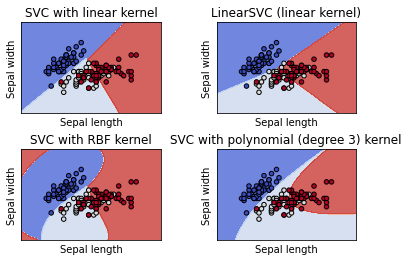

In [ ]:
#source : https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## Differences between each SVR kernel

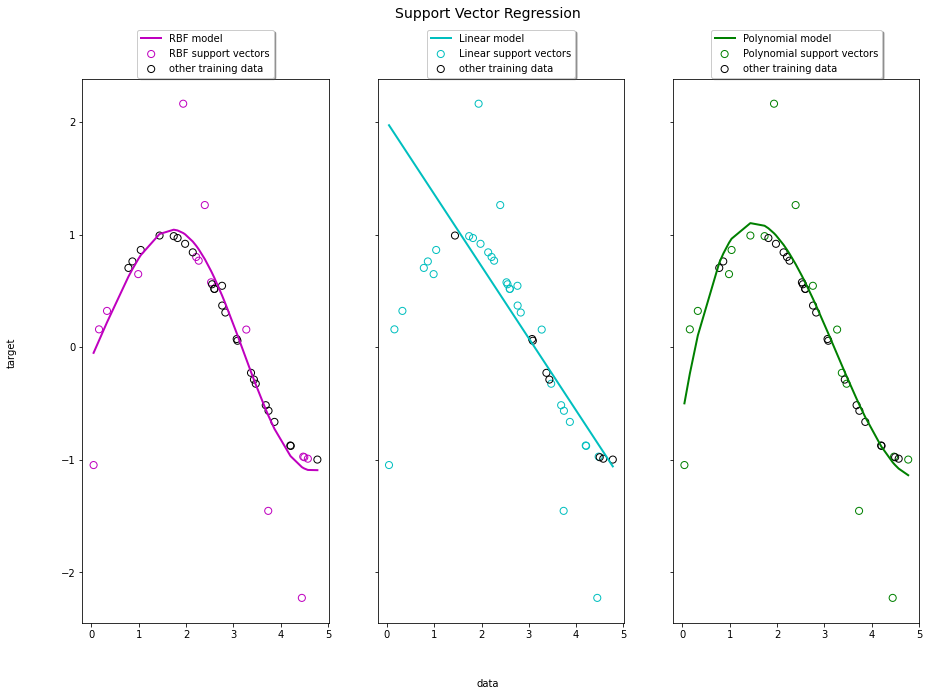

In [ ]:
#source https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## Exercise

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mobile_prices = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/mobile_prices.csv')

In [ ]:
# Mencetak dimensi data
print("data: ", mobile_prices.shape)

data:  (2000, 21)


In [ ]:
mobile_prices.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Dataset Explanation

The dataset used is the Mobile Prices dataset where we classify cellphones by price, there are 21 attributes and the target attribute is price_range

Attribute description:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores: Number of cores of processor
* PC: Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* RAM: Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi: Has wifi or not
* price_range : This is the target variable with values of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### Preprocessing


In [ ]:
# Implementasi code di sini
mobile_prices.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There is no handling of missing values because there are no missing values.

In [ ]:

print(" Duplicates: ", mobile_prices.duplicated(keep=False).sum())

Jumlah Duplikasi data:  0


There is no duplication handling because the duplication does not exist.

In [ ]:
# Implementasi code di sini
new_mobile_prices = mobile_prices.copy()

Q1 = new_mobile_prices.quantile(0.25)
Q3 = new_mobile_prices.quantile(0.75)
IQR = Q3 - Q1

upperbound = Q3 + 1.5 * IQR
lowerbound = Q1 - 1.5 * IQR

is_outlier = new_mobile_prices[(new_mobile_prices > upperbound) | (new_mobile_prices < lowerbound)]

print("Outlier: ")
print(is_outlier.count())

Banyaknya outlier untuk tiap tiap atribut: 
battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                18
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g          477
touch_screen       0
wifi               0
price_range        0
dtype: int64


Outlier Handling

In [ ]:

new_data = mobile_prices.copy()

Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1

upperbound = Q3 + 1.5 * IQR
lowerbound = Q1 - 1.5 * IQR

temp = new_data[((new_data <= upperbound) & (new_data >= lowerbound)).all(axis=1)]
is_outlier1 = temp[(new_data > upperbound) | (new_data < lowerbound)]

new_data = temp
new_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
# Implementasi code di sini
X = new_data.drop(['price_range'], axis=1)
target = new_data['price_range']

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
target = np.array(target)

In [ ]:
print(X_std[0:5])

[[-0.49664952  1.02828841 -1.23011547  0.98943167 -0.99244649  0.67876192
   1.15543413  0.69503913 -0.11962122 -0.66259185 -0.63146919  0.62580216
   1.7225596   0.45655455  1.1052184  -0.64501095 -0.71203731  0.
   0.98811839 -1.01068121]
 [-1.53991346  1.02828841 -1.23011547  0.98943167 -0.51788722  0.67876192
   0.49654026  1.39007826  0.13655606  0.21619576 -0.63146919  1.4485343
   1.08827678  0.43072893 -0.31922226 -0.87144137 -0.34385596  0.
   0.98811839 -1.01068121]
 [-1.42146428  1.02828841  1.22815669 -1.01068121 -0.99244649 -1.47327062
  -1.20560224  1.04255869 -0.26194194  0.65558956 -0.13624652  1.34052198
   1.25151133  0.58383796  0.86781162  0.48714114  0.02432539  0.
  -1.01202448 -1.01068121]
 [ 1.32564556  1.02828841 -0.36972021 -1.01068121  2.09218875  0.67876192
   0.66126373  0.34751956  0.02269949 -1.10198565  0.68912459  1.3221369
  -0.08701197 -0.66870459 -1.03144258 -0.87144137  0.7606881   0.
   0.98811839 -1.01068121]
 [ 1.41220458 -0.97248981 -1.23011547 

Implement Linear SVC. For this problem, use the SVC library with a linear kernel and LinearSVC then compare the two libraries, while also doing hyperparameter tuning C to increase model accuracy (Try using GridSearchCV).
* C is a penalty parameter, which represents
misclassification or error term. Misclassification explains how much
large error that can be tolerated for SVM optimization. These parameters
relates to how we control the tradeoff between
establishing a decision boundary (hyperplane) with an error term.

Display the accuracy, precision, recall and F1-Score values of the prediction results obtained.

### **Answer description**
I will use the sklearn.metrics library classification_report to make it easier to display precision, recall, and f1-score for each value of the target

### SVC with linear kernel

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_std, target, test_size=0.3,random_state=109) # 70% training and 30% test


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       113
           1       0.90      0.91      0.91       105
           2       0.92      0.89      0.91       119
           3       0.93      0.94      0.94       115

    accuracy                           0.92       452
   macro avg       0.92      0.92      0.92       452
weighted avg       0.92      0.92      0.92       452



### LinearSVC

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
C = 1.0  # SVM regularization parameter
# clf = svm.SVC(kernel='linear') # Linear Kernel
clf = svm.LinearSVC(C=C, max_iter=10000)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       113
           1       0.74      0.65      0.69       105
           2       0.75      0.68      0.71       119
           3       0.87      0.98      0.92       115

    accuracy                           0.82       452
   macro avg       0.82      0.82      0.82       452
weighted avg       0.82      0.82      0.82       452



There are differences in results between the linear kernel model and LinearSVC.
- If we look at the performance in predicting a target value of 0, it can be seen that the two models do not produce much different performance. Both f1-score, recall, and precision produce values that are not much different

- If we look at the performance in predicting targets with values 1, 2, and 3, the linear kernel model tends to have better performance in terms of f1-score, recall and precision compared to linearSVC

- For accuracy metrics, the linear kernel has better accuracy compared to linearSVC

In my opinion, from this analysis, it can be concluded that for this dataset, the linear kernel has better performance than LinearSVC.

## Non-Linear SVC

For this problem, use the SVC library with poly, rbf, and sigmoid kernels then compare the three libraries, while also doing hyperparameter tuning C to increase model accuracy (Try using GridSearchCV).

Display the accuracy, precision, recall and F1-Score values of the prediction results obtained.

### Poly

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['poly'],
              'degree': [3, 4],
              'gamma': ['scale','auto']}

grid = GridSearchCV(svm.SVC(), param_grid)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       113
           1       0.59      0.64      0.61       105
           2       0.65      0.59      0.62       119
           3       0.80      0.83      0.82       115

    accuracy                           0.72       452
   macro avg       0.72      0.72      0.72       452
weighted avg       0.72      0.72      0.72       452



### RBF

In [ ]:
#Implementasi code di sini
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['rbf'],
              'gamma': ['scale','auto']}

grid = GridSearchCV(svm.SVC(), param_grid)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       113
           1       0.77      0.78      0.77       105
           2       0.84      0.70      0.76       119
           3       0.84      0.95      0.89       115

    accuracy                           0.83       452
   macro avg       0.83      0.83      0.83       452
weighted avg       0.83      0.83      0.83       452



### Sigmoid

In [ ]:
#Implementasi code di sini
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['sigmoid'],
              'gamma': ['scale','auto']}

grid = GridSearchCV(svm.SVC(), param_grid)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       113
           1       0.85      0.90      0.88       105
           2       0.90      0.87      0.89       119
           3       0.91      0.94      0.92       115

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



There is a difference in performance in the poly, rbf, and sigmoid models. When viewed as a whole, sigmoid has better performance compared to rbf or poly both in terms of f1-score, recall and precision. In detail, the performance form is as follows: rbf is better than poly, then sigmoid is better than poly or rbf

It can be concluded that for this dataset, sigmoid has better performance than poly and rbf.

## SVR





1. LinearSVR uses liblinear which can actually harm intercept, while SVR(kernel = 'linear') uses libsvm which does not harm intercept. This makes LinearSVR better used for special linear cases so it can converge more quickly than SVR(kernel = 'linear'), so LinearSVR takes less time to solve a problem.

2. Data is suitable for a linear kernel when the data is linear and has good performance when the data is distributed, whereas if the linear data has poor performance when the data is distributed or you just want to do NLP processing, it is more suitable with a polynomial kernel.

3. The epsilon parameter is useful for providing limits to error in the model, while the C parameter is a factor in creating the model with the best regression. These two parameters can optimize the resulting value. Providing parameters can improve the performance of test data by optimizing each parameter. This can be done by entering the best value for each parameter so that the results are more precise.